<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KxCJz4FIwiiR6kjuk8w8SiQJzu8uZuzB?usp=sharing)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

### Elysia Tutorial: From Basics to Advanced (with Students use case)

This tutorial notebook walks you through Elysia — an agentic framework that chooses and runs tools — from the very basics to advanced customization, ending with a practical use case using a Students dataset.

What you'll do:
- Install and configure Elysia
- Create and run a minimal custom tool
- Connect to a Weaviate cluster and preprocess a collection
- Ask natural-language questions over data
- Build an advanced custom tool (linear regression)
- Apply it to a Students dataset to answer a real question

Dataset context: we'll reference a `Student` collection with fields like `Student_ID`, `Gender`, `Study_Hours`, `Attendance`, `Past_Exam`, `Parental_Education`, `Internet_Access`, `Extracurricular`, `Final_Exam`, `Pass_Fail`. Adjust field names if your schema differs.


### 0. Setup and Installation

- This installs `elysia-ai` and optional `weaviate-client`.
- If you plan to use Weaviate Cloud, you will need `WCD_URL` and `WCD_API_KEY`.
- Keep your keys secret. In Colab, you can use `google.colab.userdata`.

If you're not using Weaviate, you can still run the basic examples.


In [ ]:
# Install core package (quiet to reduce noise)
%pip install -U elysia-ai --quiet

### 1. Configure Elysia

You must configure which models to use and how to access them. Elysia integrates via LiteLLM through DSPy and supports many providers.

- Set your `OPENAI_API_KEY` (or other provider keys) here.
- If using Weaviate Cloud, also set `WCD_URL` and `WCD_API_KEY`.

You can leave Weaviate variables unset to run only the basic examples.


In [ ]:
import os
from google.colab import userdata

OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")

from elysia import configure

configure(
    base_model="gpt-4.1-mini",
    base_provider="openai",
    complex_model="gpt-4.1",
    complex_provider="openai",
    openai_api_key=OPENAI_API_KEY,

)

### 2. Basic: Minimal Tool and Tree

A tool is just an async function decorated with `@tool`. The docstring becomes the tool's description.

We'll create `add(x, y)` and call the tree with a simple math question.


In [ ]:
from elysia import tool, Tree

# Create a decision tree
basic_tree = Tree()

@tool(tree=basic_tree)
async def add(x: int, y: int) -> int:
    """Return the sum of two integers x and y."""
    return x + y

# Run the tree with a simple prompt
basic_response = basic_tree("What is the sum of 9009 and 6006?")
basic_response


[08/18/25 17:50:32] WARNING  WCD_URL and WCD_API_KEY are not set. All Weaviate functionality will be  ]8;id=313067;file:///usr/local/lib/python3.11/dist-packages/elysia/util/client.py\client.py]8;;\:]8;id=783414;file:///usr/local/lib/python3.11/dist-packages/elysia/util/client.py#151\151]8;;\
                             disabled.                                                                             

╭─────────── User prompt ───────────╮
│                                   │
│ What is the sum of 9009 and 6006? │
│                                   │
╰───────────────────────────────────╯

Output()

╭────────────────────────── Assistant response ──────────────────────────╮
│                                                                        │
│ I will calculate the sum of 9009 and 6006 using the addition function. │
│                                                                        │
╰────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Current Decision ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Node: base                                                                                                      │
│ Decision: add                                                                                                   │
│ Reasoning: The user's prompt is a straightforward arithmetic question asking for the sum of two numbers, 9009   │
│ and 6006. The available actions include a specific "add" function designed for addition, which directly matches │
│ the user's request. Using this function will provide an accurate and efficient answer. There is no need for     │
│ querying or summarizing external data, as this is a simple calculation. Therefore, selecting the "add" function │
│ with the two numbers as inputs is the most appropriate next step.                                               │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Current Decision ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Node: base                                                                                                      │
│ Decision: text_response                                                                                         │
│ Reasoning: The sum of 9009 and 6006 has already been calculated using the add function, resulting in 15015. The │
│ environment confirms this result is available. The next appropriate step is to provide this answer directly to  │
│ the user using the text_response action to complete the query.                                                  │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────── Assistant response ────────╮
│                                    │
│ The sum of 9009 and 6006 is 15015. │
│                                    │
╰────────────────────────────────────╯

('I will calculate the sum of 9009 and 6006 using the addition function. The sum of 9009 and 6006 is 15015.',
 [[{'tool_result': 15015, '_REF_ID': 'add_default_0_0'}]])

### 3. Connecting to Weaviate (Optional)

If you have a Weaviate Cloud instance, set `WCD_URL` and `WCD_API_KEY` above. Elysia can then query your collections.

We must preprocess a collection so Elysia understands field names, types, and summary context.


In [ ]:
!pip install weaviate-client --quiet

In [ ]:
# Preprocess collections only if Weaviate credentials are provided to access collecations made in Weaviate
from elysia.preprocess.collection import preprocess

WCD_URL = userdata.get("WCD_URL")
WCD_API_KEY = userdata.get("WCD_API_KEY")

from elysia import configure

configure(
    base_model="gpt-4o-mini",
    base_provider="openai",
    complex_model="gpt-4o",
    complex_provider="openai",
    openai_api_key=OPENAI_API_KEY,
    wcd_url=WCD_URL or None,
    wcd_api_key=WCD_API_KEY or None,
)


In [ ]:
if WCD_URL and WCD_API_KEY:
    try:
        preprocess("Student")
        print("Preprocessed 'Student' collection.")
    except Exception as e:
        print("Preprocess skipped or failed:", e)
else:
    print("Weaviate not configured; skipping preprocessing.")


Output()

[08/18/25 17:57:50] INFO     Preprocessed metadata for Student already exists!                    ]8;id=176732;file:///usr/local/lib/python3.11/dist-packages/elysia/preprocess/collection.py\collection.py]8;;\:]8;id=8963;file:///usr/local/lib/python3.11/dist-packages/elysia/preprocess/collection.py#426\426]8;;\

Preprocessed 'Student' collection.


### 4. Querying with Natural Language

Once preprocessed, you can ask questions in natural language. Elysia chooses the right tools (query, aggregate, summarization) to answer.


In [ ]:
import elysia

qa_tree = elysia.Tree()

# If Weaviate is configured, pass the collection name(s)
if WCD_URL and WCD_API_KEY:
    qa_response = qa_tree(
        "What is this dataset about?",
        collection_names=["Student"],
    )
else:
    # Without Weaviate, this will still run but won't retrieve data
    qa_response = qa_tree("Describe the goal of this tutorial.")

qa_response


Output()

╭──────── User prompt ────────╮
│                             │
│ What is this dataset about? │
│                             │
╰─────────────────────────────╯

╭─────────────────────────────────────────────── Current Decision ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Node: base                                                                                                      │
│ Decision: text_response                                                                                         │
│ Reasoning: The user is asking about the dataset, and I have access to the collection schema that provides a     │
│ summary of the dataset. The "Student" collection contains detailed information about student demographics,      │
│ study habits, and academic performance indicators. This summary can be directly communicated to the user to     │
│ answer their question effectively.                                                                              │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Assistant response ───────────────────────────────────────────────╮
│                                                                                                                 │
│ This dataset includes individual student records capturing demographic details, study habits, and academic      │
│ performance indicators. Key fields include gender, parental education level, study hours per week, attendance   │
│ rate, past and final exam scores, and pass/fail status. It also records whether students have internet access   │
│ at home and participate in extracurricular activities.                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

('This dataset includes individual student records capturing demographic details, study habits, and academic performance indicators. Key fields include gender, parental education level, study hours per week, attendance rate, past and final exam scores, and pass/fail status. It also records whether students have internet access at home and participate in extracurricular activities.',
 [])

### 5. Advanced: Custom Analysis Tool (Linear Regression)

Sometimes you need custom analysis beyond built-in tools. Below we implement a `BasicLinearRegression` tool as a class that Elysia can call. It:
- Extracts numeric fields from retrieved objects in the environment
- Fits a simple linear regression (with intercept) using NumPy
- Returns coefficients to the environment and plots the fit

Theory (very short): for a single feature x and target y, the least-squares solution solves for coefficients β minimizing \(\sum_i (y_i - (β_0 + β_1 x_i))^2\). In matrix form, \(β = (X^T X)^{-1} X^T y\) with X having a leading column of ones for the intercept.


In [ ]:
from elysia import Error, Tool, Result
import numpy as np
import matplotlib.pyplot as plt

class BasicLinearRegression(Tool):
    def __init__(self, logger=None, **kwargs):
        super().__init__(
            name="basic_linear_regression_tool",
            description=(
                "Use this tool to perform linear regression between two numeric variables "
                "found in retrieved objects in the environment."
            ),
            status="Running linear regression...",
            inputs={
                "environment_key": {
                    "description": (
                        "A key of the environment to use (e.g., 'query'). "
                        "All objects under that key will be used."
                    ),
                    "required": True,
                    "type": str,
                    "default": None,
                },
                "x_variable_field": {
                    "description": "Independent variable field name.",
                    "required": True,
                    "type": str,
                    "default": None,
                },
                "y_variable_field": {
                    "description": "Dependent variable field name.",
                    "required": True,
                    "type": str,
                    "default": None,
                },
            },
            end=False,
        )

    async def __call__(
        self,
        tree_data,
        inputs,
        base_lm,
        complex_lm,
        client_manager,
        **kwargs,
    ):
        environment = tree_data.environment.environment
        environment_key = inputs["environment_key"]
        x_variable_field = inputs["x_variable_field"]
        y_variable_field = inputs["y_variable_field"]

        try:
            X = np.empty((0, 2))
            y = np.empty((0, 1))

            for inner_key in environment.get(environment_key, {}):
                inner_X = np.array(
                    [
                        [obj[x_variable_field]]
                        for environment_list in environment[environment_key][inner_key]
                        for obj in environment_list["objects"]
                        if x_variable_field in obj and y_variable_field in obj
                    ]
                )
                if inner_X.size == 0:
                    continue
                inner_X = np.hstack([np.ones((inner_X.shape[0], 1)), inner_X])
                X = np.vstack([X, inner_X])

                inner_y = np.array(
                    [
                        [obj[y_variable_field]]
                        for environment_list in environment[environment_key][inner_key]
                        for obj in environment_list["objects"]
                        if x_variable_field in obj and y_variable_field in obj
                    ]
                )
                y = np.vstack([y, inner_y])

            if X.shape[0] == 0:
                yield Error(
                    "No rows with both fields present. Check field names or query step."
                )
                return

            beta_hat = np.linalg.inv(X.T @ X + 1e-10 * np.eye(X.shape[1])) @ X.T @ y
            beta_hat_dict = {
                "intercept": float(beta_hat[0]),
                "slope": float(beta_hat[1]),
            }
            pred_y = X @ beta_hat

            fig, ax = plt.subplots()
            ax.scatter(X[:, 1], y)
            ax.plot(X[:, 1], pred_y, color="red")
            ax.set_title(
                f"Linear regression between {x_variable_field} and {y_variable_field}"
            )
            ax.set_xlabel(x_variable_field)
            ax.set_ylabel(y_variable_field)
            fig.show()

            yield Result(
                objects=[beta_hat_dict],
                metadata={
                    "x_variable_field": x_variable_field,
                    "y_variable_field": y_variable_field,
                },
                llm_message=(
                    "Completed linear regression analysis where: "
                    f"x={x_variable_field}, y={y_variable_field}."
                ),
            )
        except Exception as e:
            yield Error(str(e))

    async def is_tool_available(self, tree_data, base_lm, complex_lm, client_manager):
        return (
            "query" in tree_data.environment.environment
            and len(tree_data.environment.environment["query"]) > 0
        )


### 6. Use case: Students dataset — Do more study hours correlate with final exam score?

We'll:
1) Query the `Student` collection to bring objects into the environment
2) Run `BasicLinearRegression` with `x=Study_Hours` and `y=Final_Exam`

If your schema uses different field names, adjust the strings in the cell below.


Output()

╭────────────────────────── User prompt ──────────────────────────╮
│                                                                 │
│ Retrieve student records with study hours and final exam scores │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── Assistant response ─────────────────────────────────────────────╮
│                                                                                                             │
│ I will now query the Student collection to retrieve records that include study hours and final exam scores. │
│                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Current Decision ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Node: base                                                                                                      │
│ Decision: query                                                                                                 │
│ Reasoning: To retrieve student records with study hours and final exam scores, the most appropriate action is   │
│ to use the `query` function, as it allows for retrieving specific data entries from the collections. The        │
│ `Student` collection contains the necessary fields for study hours and final exam scores, making it suitable    │
│ for this task. Since no previous errors have occurred, I can proceed with this action.                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Assistant response ────────────────────────────────────────╮
│                                                                                                    │
│ I will retrieve student records with study hours and final exam scores using a filter-only search. │
│                                                                                                    │
╰────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─── Student (Weaviate Query) ────╮
│                                 │
│ collection.query.fetch_objects( │
│     limit=5                     │
│ )                               │
│                                 │
╰─────────────────────────────────╯

╭─────────────────────────────────────── Current Decision ────────────────────────────────────────╮
│                                                                                                 │
│ Node: base.query                                                                                │
│ Decision: query_postprocessing                                                                  │
│ Reasoning: Only one option available: query_postprocessing (and no function inputs are needed). │
│                                                                                                 │
│                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────── Assistant response ──────────────────────────────────────────╮
│                                                                                                        │
│ I will now summarize the retrieved student records, including their study hours and final exam scores. │
│                                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Current Decision ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Node: base                                                                                                      │
│ Decision: cited_summarize                                                                                       │
│ Reasoning: The query for student records has been successfully executed, retrieving data that includes study    │
│ hours and final exam scores from the Student collection. The next step is to summarize this information for the │
│ user, as all relevant data has been gathered.                                                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────── Assistant response ───────────────────────────────────────────╮
│                                                                                                          │
│ The retrieved student records include the following details regarding study hours and final exam scores: │
│                                                                                                          │
│ - **Student ID: S037**                                                                                   │
│  - Study Hours per Week: 27                                                                              │
│  - Final Exam Score: 59                                                                                  │
│  - Past Exam Scores: 78                                                                                  │
│  - Attendance Rate: 79.50%                                                                               │
│  - Parental Education Level: Masters                                                                     │
│                                                                                                          │
│ - **Student ID: S209**                                                                                   │
│  - Study Hours per Week: 21                                                                              │
│  - Final Exam Score: 55                                                                                  │
│  - Past Exam Scores: 74                                                                                  │
│  - Attendance Rate: 87.53%                                                                               │
│  - Parental Education Level: PhD                                                                         │
│                                                                                                          │
│ - **Student ID: S217**                                                                                   │
│  - Study Hours per Week: 38                                                                              │
│  - Final Exam Score: 63                                                                                  │
│  - Past Exam Scores: 94                                                                                  │
│  - Attendance Rate: 79.42%                                                                               │
│  - Parental Education Level: High School                                                                 │
│                                                                                                          │
│ - **Student ID: S393**                                                                                   │
│  - Study Hours per Week: 16                                                                              │
│  - Final Exam Score: 64                                                                                  │
│  - Past Exam Scores: 95                                                                                  │
│  - Attendance Rate: 91.53%                                                                               │
│  - Parental Education Level: PhD                                                                         │
│                                                                                                          │
│ - **Student ID: S497**                                                                                   │
│  - Study Hours per Week: 10                                                                              │
│  - Final Exam Score: 59                                                                                  │
│  - Past Exam Scores: 55                                                                                  │
│  - Attendance Rate: 99.97%                                                

Output()

╭─────────────────────── User prompt ───────────────────────╮
│                                                           │
│ Run linear regression with x=Study_Hours and y=Final_Exam │
│                                                           │
╰───────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Assistant response ───────────────────────────────────────────────╮
│                                                                                                                 │
│ I will now perform linear regression using `Study_Hours` as the independent variable and `Final_Exam` as the    │
│ dependent variable.                                                                                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Current Decision ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Node: base                                                                                                      │
│ Decision: basic_linear_regression_tool                                                                          │
│ Reasoning: To run linear regression with `Study_Hours` as the independent variable and `Final_Exam` as the      │
│ dependent variable, I will use the `basic_linear_regression_tool`. The necessary data has already been          │
│ retrieved from the `Student` collection, which includes both `studyHoursPerWeek` and `finalExamScore`. This     │
│ action will allow me to perform the regression analysis directly on the collected data.                         │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Assistant response ───────────────────────────────────────────────╮
│                                                                                                                 │
│ The linear regression analysis has been completed, showing a positive relationship between study hours and      │
│ final exam scores with a slope of approximately 0.078.                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Current Decision ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Node: base                                                                                                      │
│ Decision: basic_linear_regression_tool                                                                          │
│ Reasoning: The linear regression analysis has been successfully completed using `studyHoursPerWeek` as the      │
│ independent variable and `finalExamScore` as the dependent variable. The necessary data was already retrieved   │
│ from the `Student` collection, allowing for a direct application of the `basic_linear_regression_tool`. The     │
│ results indicate a slope of approximately 0.078, suggesting a positive relationship between study hours and     │
│ final exam scores.                                                                                              │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Current Decision ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Node: base                                                                                                      │
│ Decision: text_response                                                                                         │
│ Reasoning: The linear regression analysis has already been successfully completed using `studyHoursPerWeek` as  │
│ the independent variable and `finalExamScore` as the dependent variable. The results indicate a slope of        │
│ approximately 0.078, suggesting a positive relationship between study hours and final exam scores. Since the    │
│ task of running the regression has been accomplished, no further actions are necessary at this point.           │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Assistant response ───────────────────────────────────────────────╮
│                                                                                                                 │
│ The linear regression analysis has been completed, showing a positive relationship between study hours and      │
│ final exam scores with a slope of approximately 0.078.                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

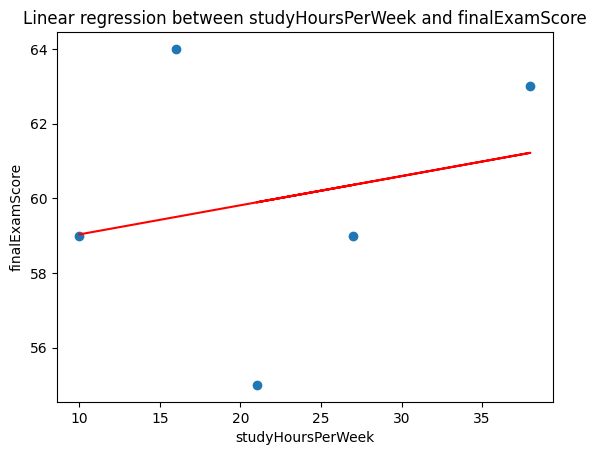

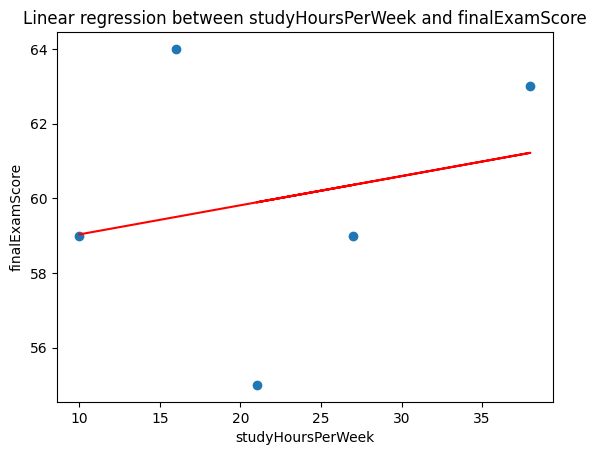

In [ ]:
students_tree = elysia.Tree()

# Add our custom tool to the tree
students_tree.add_tool(BasicLinearRegression)

if WCD_URL and WCD_API_KEY:
    # Step 1: bring data into the environment
    response1 = students_tree(
        "Retrieve student records with study hours and final exam scores",
        collection_names=["Student"],
    )

    # Step 2: run the regression tool
    response2 = students_tree(
        "Run linear regression with x=Study_Hours and y=Final_Exam",
        # Hints to the decision agent via the prompt; the tool will still validate fields
    )

    response1, response2
else:
    print("Weaviate not configured; skipping Students use case execution.")


### 7. Interpreting Results

- The tool prints the intercept and slope. A positive slope indicates higher `Study_Hours` is associated with higher `Final_Exam`.
- The scatterplot displays data points with a red best-fit line.
- Always validate with domain knowledge; correlation does not imply causation.

Next steps:
- Try different x/y fields (e.g., `Attendance` vs `Final_Exam`)
- Add categorical handling or multi-feature regression
- Build more tools for diagnostics (R², residual analysis)
